# Titanic: Machine Learning from Disaster



## columns


  * **Survival** - 생존 여부
  * **Pclass** - 티켓 등급
  * **Sex** - 성별
  * **Age** - 나이
  * **SibSp** - 동승한 형재/자매와 배우자의 총 인원 수
  * **Parch** - 동승한 부모와 자식의 총 인원 수
  * **Ticket** - 티켓 번호
  * **Fare** - 운임 요금
  * **Cabin** - 객실 번호
  * **Embarked** - 선착장

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
import matplotlib

## Load DataSet

In [2]:
train = pd.read_csv("./train.csv", index_col="PassengerId")
print(train.shape)
train.head()

(891, 11)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test = pd.read_csv("./test.csv", index_col="PassengerId")
print(test.shape)
test.head()

(418, 10)


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## Explore

### Sex

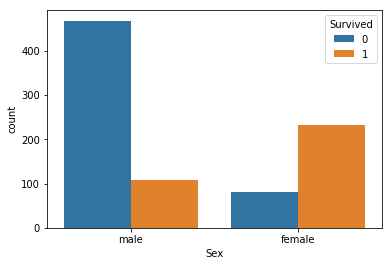

In [4]:
sns.countplot(data=train, x="Sex", hue="Survived")

In [6]:
pd.pivot_table(train, index="Sex", values="Survived")

,Survived
Sex,
female,0.742038
male,0.188908


### Pclass

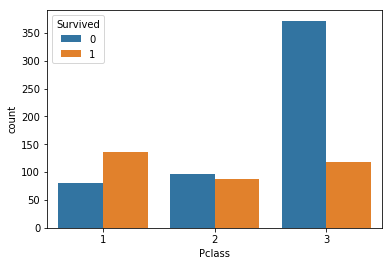

In [8]:
sns.countplot(data=train, x="Pclass", hue="Survived")

In [9]:
pd.pivot_table(train, index="Pclass", values="Survived")

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


### Embarked

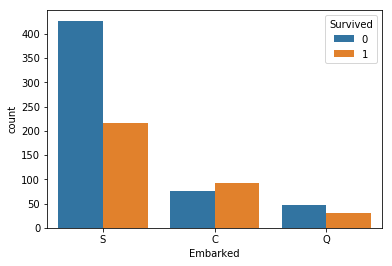

In [10]:
sns.countplot(data=train, x="Embarked", hue="Survived")

In [12]:
pd.pivot_table(train, index="Embarked", values="Survived")

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


### Age & Fare

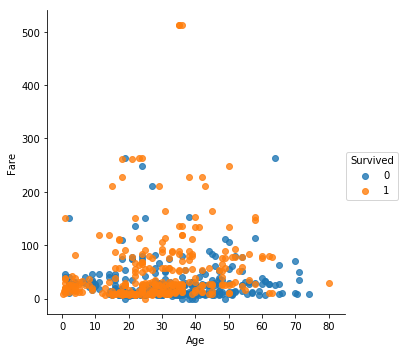

In [13]:
sns.lmplot(data=train, x="Age", y="Fare", hue="Survived", fit_reg=False)

In [14]:
low_fare = train[train["Fare"] < 100]
train.shape, low_fare.shape

((891, 11), (838, 11))

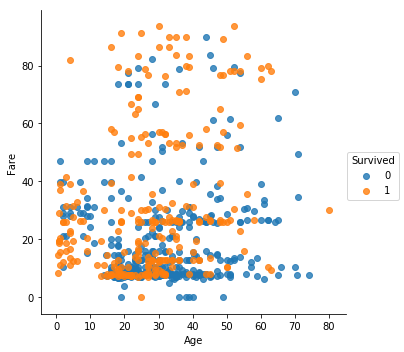

In [15]:
sns.lmplot(data=low_fare, x="Age", y="Fare", hue="Survived", fit_reg=False)

### SibSp, Parch

In [17]:
train["FamilySize"] = train["SibSp"] + train["Parch"] + 1
print(train.shape)
train[["SibSp", "Parch", "FamilySize"]].head()

(891, 12)


,SibSp,Parch,FamilySize
PassengerId,,,
1,1,0,2
2,1,0,2
3,0,0,1
4,1,0,2
5,0,0,1


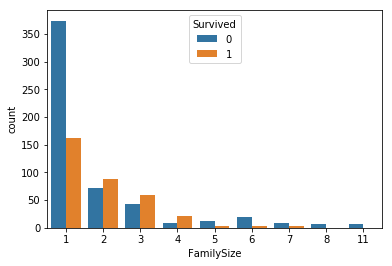

In [18]:
sns.countplot(data=train, x="FamilySize", hue="Survived")

In [19]:
train.loc[train["FamilySize"] == 1, "FamilyType"] = "Single"
train.loc[(train["FamilySize"] > 1) & (train["FamilySize"] < 5), "FamilyType"] = "Nuclear"
train.loc[train["FamilySize"] >= 5, "FamilyType"] = "Big"
print(train.shape)
train[["FamilySize", "FamilyType"]].head(10)

(891, 13)


,FamilySize,FamilyType
PassengerId,,
1,2,Nuclear
2,2,Nuclear
3,1,Single
4,2,Nuclear
5,1,Single
6,1,Single
7,1,Single
8,5,Big
9,3,Nuclear


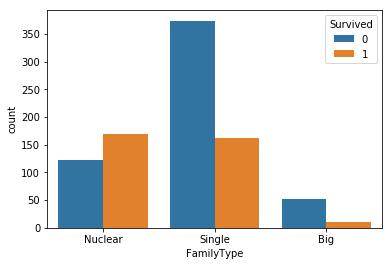

In [20]:
sns.countplot(data=train, x="FamilyType", hue="Survived")

In [21]:
pd.pivot_table(data=train, index="FamilyType", values="Survived")

,Survived
FamilyType,
Big,0.161290
Nuclear,0.578767
Single,0.303538


### Name

In [22]:
train["Name"].head()

PassengerId
1                              Braund, Mr. Owen Harris
2    Cumings, Mrs. John Bradley (Florence Briggs Th...
3                               Heikkinen, Miss. Laina
4         Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                             Allen, Mr. William Henry
Name: Name, dtype: object

In [23]:
def get_title(name):
    return name.split(", ")[1].split('. ')[0]

train["Name"].apply(get_title).unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

In [25]:
train.loc[train["Name"].str.contains("Mr"), "Title"] = "Mr"
train.loc[train["Name"].str.contains("Miss"), "Title"] = "Miss"
train.loc[train["Name"].str.contains("Mrs"), "Title"] = "Mrs"
train.loc[train["Name"].str.contains("Master"), "Title"] = "Master"
print(train.shape)
train[["Name", "Title"]].head(10)

(891, 14)


,Name,Title
PassengerId,,
1,"Braund, Mr. Owen Harris",Mr
2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Mrs
3,"Heikkinen, Miss. Laina",Miss
4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Mrs
5,"Allen, Mr. William Henry",Mr
6,"Moran, Mr. James",Mr
7,"McCarthy, Mr. Timothy J",Mr
8,"Palsson, Master. Gosta Leonard",Master
9,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",Mrs


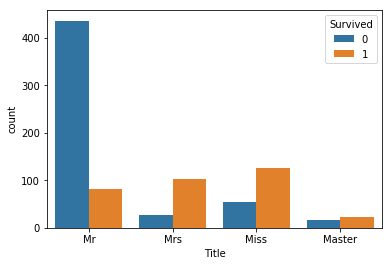

In [26]:
sns.countplot(data=train, x="Title", hue="Survived")

In [27]:
pd.pivot_table(train, index="Title", values="Survived")

,Survived
Title,
Master,0.575000
Miss,0.700000
Mr,0.158301
Mrs,0.790698


## Preprocess

### Sex

In [28]:
train.loc[train["Sex"] == "male", "Sex_encode"] = 0
train.loc[train["Sex"] == "female", "Sex_encode"] = 1
print(train.shape)
train.head()

(891, 15)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,FamilyType,Title,Sex_encode
PassengerId,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,Nuclear,Mr,0.0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,Nuclear,Mrs,1.0
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,Single,Miss,1.0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,Nuclear,Mrs,1.0
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,Single,Mr,0.0


In [29]:
test.loc[test["Sex"] == "male", "Sex_encode"] = 0
test.loc[test["Sex"] == "female", "Sex_encode"] = 1
print(test.shape)
test[["Sex", "Sex_encode"]].head()

(418, 11)


,Sex,Sex_encode
PassengerId,,
892,male,0.0
893,female,1.0
894,male,0.0
895,male,0.0
896,female,1.0


### Fare, filling in missing data

In [30]:
train[train["Fare"].isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,FamilyType,Title,Sex_encode
PassengerId,,,,,,,,,,,,,,,


In [31]:
test[test["Fare"].isnull()]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_encode
PassengerId,,,,,,,,,,,
1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S,0.0


In [32]:
train["Fare_fillin"] = train["Fare"]
print(train.shape)
train[["Fare", "Fare_fillin"]].head()

(891, 16)


,Fare,Fare_fillin
PassengerId,,
1,7.2500,7.2500
2,71.2833,71.2833
3,7.9250,7.9250
4,53.1000,53.1000
5,8.0500,8.0500


In [33]:
test["Fare_fillin"] = test["Fare"]
print(test.shape)
test[["Fare", "Fare_fillin"]].head()

(418, 12)


,Fare,Fare_fillin
PassengerId,,
892,7.8292,7.8292
893,7.0000,7.0000
894,9.6875,9.6875
895,8.6625,8.6625
896,12.2875,12.2875


In [34]:
test.loc[test["Fare"].isnull(), "Fare_fillin"] = 0
test.loc[test["Fare"].isnull(), ["Fare", "Fare_fillin"]]

,Fare,Fare_fillin
PassengerId,,
1044,NaN,0.0


### Embarked

In [35]:
train["Embarked_C"] = train["Embarked"] == "C"
train["Embarked_S"] = train["Embarked"] == "S"
train["Embarked_Q"] = train["Embarked"] == "Q"
print(train.shape)
train[["Embarked", "Embarked_C", "Embarked_S", "Embarked_Q"]].head()

(891, 19)


,Embarked,Embarked_C,Embarked_S,Embarked_Q
PassengerId,,,,
1,S,False,True,False
2,C,True,False,False
3,S,False,True,False
4,S,False,True,False
5,S,False,True,False


In [36]:
test["Embarked_C"] = test["Embarked"] == "C"
test["Embarked_S"] = test["Embarked"] == "S"
test["Embarked_Q"] = test["Embarked"] == "Q"
print(test.shape)
test[["Embarked", "Embarked_C", "Embarked_S", "Embarked_Q"]].head()

(418, 15)


,Embarked,Embarked_C,Embarked_S,Embarked_Q
PassengerId,,,,
892,Q,False,False,True
893,S,False,True,False
894,Q,False,False,True
895,S,False,True,False
896,S,False,True,False


### Age - under 15 -> child

In [37]:
train["Child"] = train["Age"] < 15
print(train.shape)
train[["Age", "Child"]].head(10)

(891, 20)


,Age,Child
PassengerId,,
1,22.0,False
2,38.0,False
3,26.0,False
4,35.0,False
5,35.0,False
6,NaN,False
7,54.0,False
8,2.0,True
9,27.0,False


In [38]:
test["Child"] = test["Age"] < 15
print(test.shape)
test[["Age", "Child"]].head(10)

(418, 16)


,Age,Child
PassengerId,,
892,34.5,False
893,47.0,False
894,62.0,False
895,27.0,False
896,22.0,False
897,14.0,True
898,30.0,False
899,26.0,False
900,18.0,False


### SibSp, Parch -> FamilySize

In [39]:
train["FamilySize"] = train["SibSp"] + train["Parch"] + 1
print(train.shape)
train[["SibSp", "Parch", "FamilySize"]].head()

(891, 20)


,SibSp,Parch,FamilySize
PassengerId,,,
1,1,0,2
2,1,0,2
3,0,0,1
4,1,0,2
5,0,0,1


In [40]:
test["FamilySize"] = test["SibSp"] + test["Parch"] + 1
print(test.shape)
test[["SibSp", "Parch", "FamilySize"]].head()

(418, 17)


,SibSp,Parch,FamilySize
PassengerId,,,
892,0,0,1
893,1,0,2
894,0,0,1
895,0,0,1
896,1,1,3


In [41]:
train["Single"] = train["FamilySize"] == 1
train["Nuclear"] = (train["FamilySize"] > 1) & (train["FamilySize"] < 5)
train["Big"] = train["FamilySize"] >= 5
print(train.shape)
train[["FamilySize", "Single", "Nuclear", "Big"]].head(10)

(891, 23)


,FamilySize,Single,Nuclear,Big
PassengerId,,,,
1,2,False,True,False
2,2,False,True,False
3,1,True,False,False
4,2,False,True,False
5,1,True,False,False
6,1,True,False,False
7,1,True,False,False
8,5,False,False,True
9,3,False,True,False


In [42]:
test["Single"] = test["FamilySize"] == 1
test["Nuclear"] = (test["FamilySize"] > 1) & (test["FamilySize"] < 5)
test["Big"] = test["FamilySize"] >= 5
print(test.shape)
test[["FamilySize", "Single", "Nuclear", "Big"]].head(10)

(418, 20)


,FamilySize,Single,Nuclear,Big
PassengerId,,,,
892,1,True,False,False
893,2,False,True,False
894,1,True,False,False
895,1,True,False,False
896,3,False,True,False
897,1,True,False,False
898,1,True,False,False
899,3,False,True,False
900,1,True,False,False


### Name

In [43]:
train["Master"] = train["Name"].str.contains("Master")
print(train.shape)
train[["Name", "Master"]].head(10)

(891, 24)


,Name,Master
PassengerId,,
1,"Braund, Mr. Owen Harris",False
2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",False
3,"Heikkinen, Miss. Laina",False
4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",False
5,"Allen, Mr. William Henry",False
6,"Moran, Mr. James",False
7,"McCarthy, Mr. Timothy J",False
8,"Palsson, Master. Gosta Leonard",True
9,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",False


In [44]:
test["Master"] = test["Name"].str.contains("Master")
print(test.shape)
test[["Name", "Master"]].head(10)

(418, 21)


,Name,Master
PassengerId,,
892,"Kelly, Mr. James",False
893,"Wilkes, Mrs. James (Ellen Needs)",False
894,"Myles, Mr. Thomas Francis",False
895,"Wirz, Mr. Albert",False
896,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",False
897,"Svensson, Mr. Johan Cervin",False
898,"Connolly, Miss. Kate",False
899,"Caldwell, Mr. Albert Francis",False
900,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",False


## Train

In [45]:
feature_names = ["Pclass", "Sex_encode", "Fare_fillin", "Embarked_C", "Embarked_S", "Embarked_Q", "Child", "Single", "Nuclear", "Big", "Master"]
feature_names

['Pclass',
 'Sex_encode',
 'Fare_fillin',
 'Embarked_C',
 'Embarked_S',
 'Embarked_Q',
 'Child',
 'Single',
 'Nuclear',
 'Big',
 'Master']

In [46]:
label_name = "Survived"
label_name

'Survived'

In [47]:
X_train = train[feature_names]
print(X_train.shape)
X_train.head()

(891, 11)


,Pclass,Sex_encode,Fare_fillin,Embarked_C,Embarked_S,Embarked_Q,Child,Single,Nuclear,Big,Master
PassengerId,,,,,,,,,,,
1,3,0.0,7.2500,False,True,False,False,False,True,False,False
2,1,1.0,71.2833,True,False,False,False,False,True,False,False
3,3,1.0,7.9250,False,True,False,False,True,False,False,False
4,1,1.0,53.1000,False,True,False,False,False,True,False,False
5,3,0.0,8.0500,False,True,False,False,True,False,False,False


In [48]:
X_test = test[feature_names]
print(X_test.shape)
X_test.head()

(418, 11)


,Pclass,Sex_encode,Fare_fillin,Embarked_C,Embarked_S,Embarked_Q,Child,Single,Nuclear,Big,Master
PassengerId,,,,,,,,,,,
892,3,0.0,7.8292,False,False,True,False,True,False,False,False
893,3,1.0,7.0000,False,True,False,False,False,True,False,False
894,2,0.0,9.6875,False,False,True,False,True,False,False,False
895,3,0.0,8.6625,False,True,False,False,True,False,False,False
896,3,1.0,12.2875,False,True,False,False,False,True,False,False


In [49]:
y_train = train[label_name]
print(y_train.shape)
y_train.head()

(891,)


PassengerId
1    0
2    1
3    1
4    1
5    0
Name: Survived, dtype: int64

## Use DecisionTree

In [50]:
model = DecisionTreeClassifier(max_depth=8, random_state=0)
model

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=8,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [51]:
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=8,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

## Predict

In [52]:
predictions = model.predict(X_test)
print(predictions.shape)
predictions[0:10]

(418,)


array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0])

## Submit

In [54]:
submission = pd.read_csv("./gender_submission.csv")
print(submission.shape)
submission.head()

(418, 2)


,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [55]:
submission["Survived"] = predictions
print(submission.shape)
submission.head()

(418, 2)


,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [57]:
submission.to_csv("./0.81818.csv")